In [ ]:
import warnings
warnings.filterwarnings('ignore')

The beginning of this lecture is based on chapter 11 of *Automate the Boring Stuff with Python* by Al Sweigart

# HTML Refresher

HTML files are plain text files containing *tags*, which are words enclosed in angle brackets. Tags tell the browser how to format the web page. A starting tag and closing tag can enclose some text to form an element. The text (or inner HTML) is the content between the starting and closing tags.

There are many different tags in HTML. Some of these tags have extra properties in the form of attributes within the angle brackets. For example, the `<a>` tag encloses text that should be a link.

Some elements have an `id` attribute that is used to uniquely identify the element in the page. You will often instruct your programs to seek out an element by its id attribute, so figuring out an element’s id attribute using the browser’s developer tools is a common task in writing web scraping programs.

In [7]:
%%bash

echo "<strong>Hej</strong> class!<br>" > hej.html
echo "The <a href=\"https://github.com/HelgeCPH/get_things_done_with_python\">Lecture Notes</a>." >> hej.html

http://127.0.0.1:8888/files/hej.html


# View a Page's HTML Sources

Here, I will only describe how to use Firefox' development features.

To view a page's sources right click on it and choose **View page source** which opens a new tab with the HTML sources.

![screenshot](images/view_source_small.png)


In Firefox, you can bring up the Web Developer Tools Inspector by pressing `CTRL-SHIFT-C` on Windows and Linux or by `CMD-OPTION-C` on OS X.

![screenshot](images/inspector_small.png)

# Parsing HTML with BeautifulSoup

BeautifulSoup is a module for parsing and extracting information from HTML sources. The module’s name is bs4. In case it is not already install to your VM, install it with `pip install beautifulsoup4`. While beautifulsoup4 is the name used for installation, to import BeautifulSoup you have to use `import bs4`.

According to its documentation (https://www.crummy.com/software/BeautifulSoup/) *"Beautiful Soup parses anything you give it, and does the tree traversal stuff for you. You can tell it "Find all the links", or "Find all the links of class externalLink", or "Find all the links whose urls match "foo.com", or "Find the table heading that's got bold text, then give me that text.""*


## Creating a BeautifulSoup Object from a Local HTML File

The `bs4.BeautifulSoup()` function needs to be called with a string containing the HTML it will parse. The `bs4.BeautifulSoup()` function returns is a `BeautifulSoup` object.

You can load a local HTML file and pass a file object to `bs4.BeautifulSoup()`.

In [10]:
import bs4


with open('./example.html') as f:
    example_html = f.read()
    
soup = bs4.BeautifulSoup(example_html)
type(soup)

bs4.BeautifulSoup

## Creating a BeautifulSoup Object from a Remote HTML File



In [11]:
import bs4
import requests


r = requests.get('https://github.com/HelgeCPH/get_things_done_with_python')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text)

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/frameworks-5b61aadc846f0818981ceec31b49c475fb084c163fdec5efbc2c21ef539092a9.css" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/github-a6720525ed4750f11753392a129b93db4c1325c17b18fa4c6637b1731d97aeaf.css" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/site-b29e324b8fafaead965049ef224818ef0dccc7384b5cfcad56a56a89c33a9438.css" media="all" rel="stylesheet"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   GitHub - HelgeCPH/get_things_done_with_python: Repository containing the course material for the elective course "Getting Things Done with Python" (Spring 2017) at CPH Business Academy (www.cphbusiness.dk).
  </title>
  <link href="/opensearch.xml" rel="search" title="GitHub" type="application/opensearchdescripti

## Finding an Element with the `select()` Method

You can retrieve HTML elements from a `BeautifulSoup` object by calling the `select()` method and passing a string of a CSS selector for the element you are looking for. Selectors are like regular expressions: They specify a pattern to look for, in this case, in HTML pages instead of general text strings.

Common CSS selector patterns include:

  * `soup.select('div')` ... selects all elements named `<div>`
  * `soup.select('#lecturer')`  ... selects the element with an id attribute of author
  * `soup.select('.notice')` ... selects all elements that use a CSS class attribute named notice
  * `soup.select('div span')` ... selects all elements named ``<span>` that are within an element named `<div>`
  * `soup.select('div > span')` ... selects all elements named `<span>` that are directly within an element named `<div>`, with no other element in between
  * `soup.select('input[name]')` ... selects all elements named `<input>` that have a name attribute with any value
  * `soup.select('input[type="button"]')` ... selects all elements named `<input>` that have an attribute named type with value button
  
See more in the documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors

In [13]:
import bs4


with open('./example.html') as f:
    example_html = f.read()
    
soup = bs4.BeautifulSoup(example_html)

elems = soup.select('#lecturer')

#print(soup.prettify())
print(type(elems))
print(len(elems))
print(type(elems[0]))
print(elems[0].getText())
print(str(elems[0]))
print(elems[0].attrs)

<class 'list'>
1
<class 'bs4.element.Tag'>
Helge
<span id="lecturer">Helge</span>
{'id': 'lecturer'}


In [14]:
p_elems = soup.select('p')

for el in p_elems:
    # str(p_elems[0]), str(p_elems[1]),...
    print(str(el))
    print(el.getText())
    print('------------')

<p>Find the <strong>Lecture Notes</strong> on <a href="https://github.com/HelgeCPH/get_things_done_with_python">Github</a>.</p>
Find the Lecture Notes on Github.
------------
<p class="slogan">Getting Things Done with Python!</p>
Getting Things Done with Python!
------------
<p>Tought by <span id="lecturer">Helge</span> at <span id="institution">CPH Business</span> </p>
Tought by Helge at CPH Business 
------------


## Getting Data from an Element’s Attributes

The `get()` method for Tag objects makes it simple to access attribute values from an element. The method is passed a string of an attribute name and returns that attribute’s value.

In [15]:
import bs4

with open('./example.html') as f:
    example_html = f.read()
    
soup = bs4.BeautifulSoup(example_html)

span_elem = soup.select('span')[0]
print(str(span_elem))
print(span_elem.get('id'))
print(span_elem.get('some_nonexistent_addr') == None)
print(span_elem.attrs)

<span id="lecturer">Helge</span>
lecturer
True
{'id': 'lecturer'}


# Example Scraping Events from a Page


Ususally, you will use web scraping to collect information, which you cannot gather otherwise. For example, let's imagine we want to do some statistics about concerts in Copenhagen, their start times and their door prices.

Since we cannot find an API or any other open dataset, we decide to scrape the publicly available homepage www.kultunaut.dk, which lists all possible events in Denmark. Concerts in Copenhagen are for example accessible here: http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?showmap=&Area=Kbh.+og+Frederiksberg&periode=&Genre=Musik

**OBS** Many web pages are not built to support high traffic or they exlicitely discourage automatic access. Keep this in mind when writing your scraping tool.


Considering our example, we have to first figure out how many events there are at all. We need this information, as events are given paginated, i.e., twenty events per page. The link given above only returns the link to the first page with the first twenty events. Out of the total amount of events we can generate the URLs for the subsequent results.

In [16]:
import bs4
import re
import requests


def scrape_no_events(url):
    """
    Find amount of pages to parse from the entry html page
    
    returns:
        An integer with the amount of events
    """
    r = requests.get(base_url)
    r.raise_for_status()
    soup = bs4.BeautifulSoup(r.text)

    tables = soup.select('table')

    # The second table of depth three holds the amount of events
    depth3 = [t for t in tables if len(t.find_parents('table')) == 3]
    # The only bold element holds the amount of events
    event_str = depth3[1].select('b')[0].text.splitlines()[0]

    reg_exp = r'Showing .+ of (?P<events>\d+)'
    m = re.search(reg_exp, str(event_str))
    no_events = int(m.group('events'))
    
    return no_events

base_url = 'http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?showmap=&Area=Kbh.+og+Frederiksberg&periode=&Genre=Musik' 
no_events = scrape_no_events(base_url)
print('Scraping {} events...'.format(no_events))

Scraping 1216 events...


Now, we can scrape the events per page. Observe, that now, out `base_url` http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?Startnr={}&showmap=&Area=Kbh.%20og%20Frederiksberg&periode=&Genre=Musik& has a placeholder for the paginated results (`Startnr=`).

Consequently, we scrape each page separately, see the function `scrape_events_per_page`. From examining the page's source code, we know that events are all given as table entries with a corresponding header. We iterate over each of the table cells and extract the strings for dates and prices if they exist.

In [17]:
from tqdm import tqdm

    
def scrape_events_per_page(url):
    """
    returns:
        A list of tuples of strings holding title, place, date, and price
        for concerts in Copenhagen scraped from Kulturnaut.dk
    """
    r = requests.get(url)
    r.raise_for_status()
    soup = bs4.BeautifulSoup(r.text)
    event_cells = soup.find_all('td', {'width': '100%', 'valign' : 'top'})

    scraped_events_per_page = []
    for event_cell in event_cells:
        try:
            title = event_cell.find('b').text
            spans = event_cell.find_all('span')
            place = spans[1].text
            try:
                date, price = spans[0].text.splitlines()
            except ValueError as e:
                date = spans[0].text.splitlines()[0]
                price = ''
        except Exception as e:
            print(e)
            
        scraped_events_per_page.append((title, place, date, price))
        
    return scraped_events_per_page


base_url = 'http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?Startnr={}&showmap=&Area=Kbh.%20og%20Frederiksberg&periode=&Genre=Musik&'

scraped_events = []
indexes = list(range(1, no_events, 20))
indexes[0] = 0

for idx in tqdm(indexes):
    scrape_url = base_url.format(idx)
    scraped_events += scrape_events_per_page(scrape_url)


100%|██████████| 61/61 [00:49<00:00,  1.23it/s]


### What do we have so far?

Now, you can see that we extracted a list of four element string tuples consisting of the title of the event, its location, a date and a time, and an entrance fee.

In [18]:
scraped_events

[('Onsdagskoncert.',
  'Betty Nansen Teatret, Frederiksberg Allé 57, Frederiksberg C',
  'Wed 22 March 2017, 5 pm  - 5.45 pm.',
  '(Free admission)'),
 ('De små spiser præsenterer: Babybandet (duo) // Blandede bolcher.',
  'Kulturhuset Pilegården, Brønshøjvej 17, Brønshøj',
  'Wed 22 March 2017, 5.30 pm  - 6.45 pm.',
  '(Entrance fee: 65 DKK.)'),
 ('Musik til den stille tid.',
  'Sankt Stefans Kirke, Nørrebrogade 191, Copenhagen N',
  'Wed 22 March 2017, 7 pm.',
  '(Free admission)'),
 ('Jazz på Cafe Emma.',
  'Cafe Emma, Axeltorv 3, Copenhagen V',
  'Wed 22 March 2017, 7 pm.',
  '(Free admission)'),
 ('Jazz in your ears. Bubbles in your glass.',
  'Balthazar, Ny Øsgtergade 6, Copenhagen K',
  'Wed 22 March 2017, 7 pm  - 10 pm.',
  '(Free admission)'),
 ('Jazz in your ears. Bubbles in your glass.',
  "Hotel D'Angleterre, Kongens Nytorv 34, Copenhagen K",
  'Wed 22 March 2017, 7 pm  - 10 pm.',
  '(Free admission)'),
 ('De smukkeste operakor.',
  'Koncerthuset DR, DR Byen, Emil Holms Kan

### How to Extract Dates and Prices from Strings.

Remember, the raw data, which we extracted from the web pages is all of type `str`. To do statistics about possible correlation of start times and entry fees, we need to convert the corresponding tuple fields into datetimes and integers respectively.


Since dates given on the web do not necessarily conform to standardized time formats, we can apply the `dateparser` (https://pypi.python.org/pypi/dateparser) module, which tries to parse arbitrary strings into datetimes.

You can install the module via:

```bash
pip install dateparser
```

You can read more about the module and its capabilities https://dateparser.readthedocs.io/en/latest/.

In [19]:
from tqdm import tqdm
from dateparser import parse


def get_dates_and_prices(scraped_events):
    """
    Cleanup the data. Get price as integer and date as date.
    
    returns:
        A two-element tuple with a datetime representing the start 
        time of an event and an integer representing the price in Dkk.
    """

    price_regexp = r"(?P<price>\d+)"

    data_points = []

    for event_data in tqdm(scraped_events):
        title_str, place_str, date_str, price_str = event_data
        
        if 'Free admission' in price_str:
            price = 0
        else:
            m = re.search(price_regexp, price_str)
            try:
                price = int(m.group('price'))
            except:
                price = 0

        date_str = date_str.strip().strip('.')
        if '&' in date_str:
            date_str = date_str.split('&')[0]
        if '-' in date_str:
            date_str = date_str.split('-')[0]
        if '.' in date_str:
            date_str = date_str.replace('.', ':')
        
        date = parse(date_str)
        if date:
            data_points.append((date, price))
            
    return data_points


dates_and_prices = get_dates_and_prices(scraped_events)

100%|██████████| 1220/1220 [00:50<00:00, 23.93it/s]


In [20]:
dates_and_prices

[(datetime.datetime(2017, 3, 22, 17, 0), 0),
 (datetime.datetime(2017, 3, 22, 17, 30), 65),
 (datetime.datetime(2017, 3, 22, 19, 0), 0),
 (datetime.datetime(2017, 3, 22, 19, 0), 0),
 (datetime.datetime(2017, 3, 22, 19, 0), 0),
 (datetime.datetime(2017, 3, 22, 19, 0), 0),
 (datetime.datetime(2017, 3, 22, 19, 30), 300),
 (datetime.datetime(2017, 3, 22, 19, 30), 50),
 (datetime.datetime(2017, 3, 22, 20, 0), 200),
 (datetime.datetime(2017, 3, 22, 20, 0), 100),
 (datetime.datetime(2017, 3, 22, 20, 0), 120),
 (datetime.datetime(2017, 3, 22, 20, 30), 135),
 (datetime.datetime(2017, 3, 22, 21, 0), 200),
 (datetime.datetime(2017, 3, 22, 21, 0), 125),
 (datetime.datetime(2017, 3, 22, 21, 0), 100),
 (datetime.datetime(2017, 3, 24, 1, 0), 0),
 (datetime.datetime(2017, 3, 24, 15, 0), 0),
 (datetime.datetime(2017, 3, 24, 15, 30), 120),
 (datetime.datetime(2017, 3, 24, 19, 0), 0),
 (datetime.datetime(2017, 3, 24, 19, 0), 0),
 (datetime.datetime(2017, 3, 24, 19, 30), 210),
 (datetime.datetime(2017, 3,

### Plotting Times vs. Prices

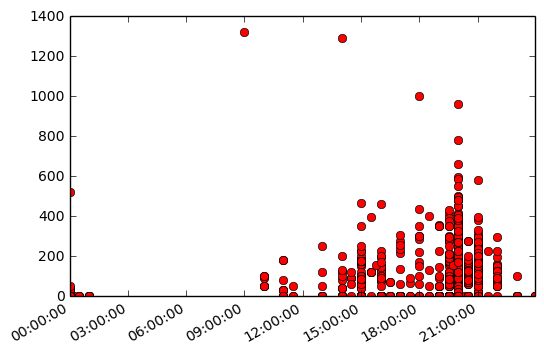

In [21]:
%matplotlib inline 

from datetime import datetime
import matplotlib.pyplot as plt


dates, prices = zip(*dates_and_prices)
ref_day = datetime.today()
times = [datetime.combine(ref_day, t.time()) for t in dates]

# plot
plt.plot(times, prices, 'ro')
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

### The Pearson Correlation Coefficient

The Pearson correlation coefficient measures the linear relationship
between two datasets. Like other correlation coefficients, this one varies between -1 and +1
with 0 implying no correlation. Correlations of -1 or +1 imply an exact
linear relationship. Positive correlations imply that as x increases, so
does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

In [22]:
import matplotlib
from scipy.stats.stats import pearsonr


x, y = zip(*dates_and_prices)
x = matplotlib.dates.date2num(x)

pearsonr(x, y)

(0.084901844616444178, 0.0077370037943444566)

Consequently, since our Pearson Correlation Coefficient and the corresponding p-value are quite close to zero, there is likely no correlation between the start time of a concert and the price you have to pay for it.

# Scraping Images from a Page

In the following just another small example on how to use Beautiful Soup. Here, we extract all links to images, which are in `img` tags on a web page.

In [ ]:
import bs4
import os
import sys
import requests


def collect_img_links(url):
    r = requests.get(url)
    r.raise_for_status()
    soup = bs4.BeautifulSoup(r.text)
    
    return [img.get('src') for img in soup.select('img') 
            if img.get('src').startswith('http')]


def download_imgs(links, out_folder="./test/"):
    for l in links:
        # You know how to do this!
        pass 
        
        
collect_img_links('https://www.google.dk/search?site=&tbm=isch&source=hp&biw=1163&bih=812&q=minions&oq=minions')

# Writing a Simple Web Crawler

As last example, we will write a simple web crawler. More precisely, a program that extracts recursively all links from web pages. The result of running the web crawler is a dictionary, were the key-value pairs correspond to outgoiung links from a web page with the URL, which is stored in the key.


In case a page returns a status code, which is not `200` we just disregard this page. See https://en.wikipedia.org/wiki/List_of_HTTP_status_codes for more detailes on the various HTTP status codes.

In [ ]:
import re
import bs4
import pprint
import requests
from tqdm import tqdm


seen_that = set([])
skipped_that = set([])


def scrape_links_of_page(url):
    """
    url:
        The URL as string of the page under consideration.
    returns:
        A list of tuples of strings holding title, place, date, and price
        for concerts in Copenhagen scraped from Kulturnaut.dk
    """

    scraped_links = set([])
    if not url in seen_that:
        seen_that.update([url])
        try:
            r = requests.get(url, verify=False)
            if r.status_code == 200:
                soup = bs4.BeautifulSoup(r.text)

                for link in soup.select('a'):
                    possible_link = link.get('href')
                    if possible_link and isinstance(possible_link, str) and (
                        possible_link.startswith('http')):
                        scraped_links.update([possible_link])
            else:
                print('Skipped {} ... got {}'.format(r.url, r.status_code))
                skipped_that.update([r.url])
        except Exception as e:
            print(e)
            skipped_that.update([url])
    return {url: list(scraped_links)}


def scrape_links_of_pages(urls):
    out_links = {}
    for url in tqdm(urls):
        link_edges = scrape_links_of_page(url)
        out_links.update(link_edges)
        
    return out_links

In [ ]:
def scrape_links(from_url, for_depth, all_links={}):
    # This is what the exercise below asks you to implement!
    pass


start_url = 'https://www.version2.dk/artikel/google-deepmind-vi-oeger-sikkerheden-mod-misbrug-sundhedsdata-1074452'

link_dict = scrape_links(from_url=start_url, for_depth=2)

In [ ]:
link_dict

In [ ]:
start_url = 'https://github.com/HelgeCPH/get_things_done_with_python/blob/master/notebooks/02-Getting%20Started.ipynb'
link_dict = scrape_links(from_url=start_url, for_depth=3)



In [ ]:
link_dict

The web crawler that you wrote above is perhaps not the most performant. If you are interested in more web scraping and application of crawlers have a look at the `scrapy` module (https://scrapy.org)

# Exercises!!!

  * Finish the implementation of the web crawler. **Hint** Likely you want to implement a recursive crawler.
  * Create a Directed Graph with web pages as nodes and links between pages as edges. An edge follows the direction of the link, i.e., it's tail is the page on which a link appears as an `href` and it's head is the node representing the corresponding page.
  * Apply the PageRank algorithm from the previous lecture onto this graph and find the most highly ranked page.
  
  
# The Study Point Exercises!!!

Group *Enthusiastic Phone* presents their tasks on analyzing data on aviation accidents https://github.com/edipetres/Depressed_Year/tree/master/Dataset_Assignment.



## Hand-in Guidelines
How is your hand-in expected to look like?

  * You push the source code computing your solutions to a repository on Github.
  * You create a README.md file that presents your solution, each result per questions, and it explains how to run your code to reproduce your results.
  * Inform Helge when you are done. At latest at 24:00 the March 28th.
  * You prepare a short (max. 10 minutes) presentation for the next session, so that the other students know what you have done and how you tackled the problem. Furthermore, based on this presentation group *Jealous Secretary* will choose the winner of this round.

In [23]:
import pandas as pd

pd.read_csv?




    

In [ ]:
Do not set nans to something else
How to handle nans?

Ask in issues

@Helge: How to handle nan